# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


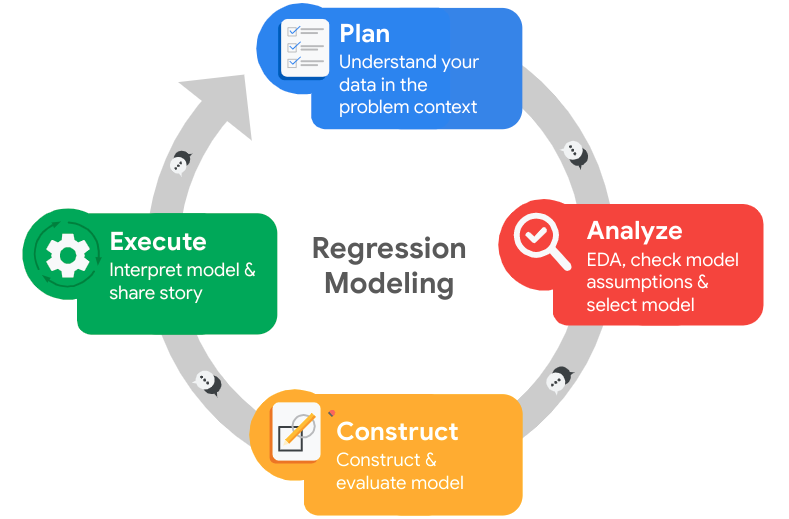

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders primarily include Sailfort's senior leadership, but the mutual costs of low employee retention rates can also be damaging to people throughout the company so curruent and futures can also be thought of as indirect stakeholders. 

The goal is to help the company increase retention and job satisfaction for current employees, and save money and time training new employees. This analysis is intended to help the leadership team determine what underlying factors contribute to an employee leaving the company. The model that is created will allow them to increase average employee retention rates and allow them to identify "at-risk" employees based on predictor variables. 

When exploring the initial data, I noticed that the data has a very large number of data points that can be considered outliers. Some features are continuous, while most are discrete (especially after one-hot encoding categorical variables). The need for a binary classifier, and the high level of variance across the dataset, suggests that the type of model used should be resistant to the effects of outliers while being able to accurately predict a binary outcome variable from a large number of predictor variables. 

I found myself referencing past labs and researching the documentation for the various tools imported into the notebook.

When considering the ethical ramifications of creating the model, I am concerned about potential misuse of the model. For example, if the model can be used to predict which employees are likely to quit, an unscrupulous employer could use the  same underlying factors to maximize the likelihood of a particular employee quitting. In this scenario, the model isn't used to increase employee retention company wide, instead becoming a tool used to make parting ways with undesireable employees easier or less obvious.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Ensure that all dataframes will be displayed
pd.set_option('display.max_columns', None)

# Display first few rows of the dataframe
df0.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Print the dataframe dimensions
df0.shape

(14999, 10)

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
columns = df0.columns.tolist()
for column in columns:
    print(column)


satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [7]:
#df0['Department'].value_counts() gives 10 categories: sales (4140), technical (2720), support (2229), IT  (1227), 
# product_mng (902), marketing (858), RandD (787), accounting (767), hr (739), and management (630),

#df0['salary'].value_counts() gives 3 categories: low (7316), medium (6446), and high (1237)

# Rename columns as needed
df0.rename(columns={'time_spend_company': 'tenure'}, inplace=True)
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Convert categorical variable to numerical type using one-hot encoding
df1 = df0.copy()
df1 = pd.get_dummies(df1, drop_first = True)

# Display all column names after the update
columns = df1.columns.tolist()
for column in columns:
    print(column)


satisfaction_level
last_evaluation
number_project
average_monthly_hours
tenure
Work_accident
left
promotion_last_5years
Department_RandD
Department_accounting
Department_hr
Department_management
Department_marketing
Department_product_mng
Department_sales
Department_support
Department_technical
salary_low
salary_medium


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
missing_values = df1.isna().sum()
missing_values

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
tenure                    0
Work_accident             0
left                      0
promotion_last_5years     0
Department_RandD          0
Department_accounting     0
Department_hr             0
Department_management     0
Department_marketing      0
Department_product_mng    0
Department_sales          0
Department_support        0
Department_technical      0
salary_low                0
salary_medium             0
dtype: int64

In [9]:
# check that all dtypes are now numeric
df1.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department_RandD            uint8
Department_accounting       uint8
Department_hr               uint8
Department_management       uint8
Department_marketing        uint8
Department_product_mng      uint8
Department_sales            uint8
Department_support          uint8
Department_technical        uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
num_duplicates = df1.duplicated().sum()
num_duplicates

3008

In [11]:
# Inspect some rows containing duplicates as needed
duplicates = df1.duplicated(keep=False)
duplicated_rows = df1[duplicates]
duplicated_rows

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df2 = df1.drop_duplicates(subset=None, keep='first', inplace=False)

# Display first few rows of new dataframe as needed
df2.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1


### Check outliers

Check for outliers in the data.

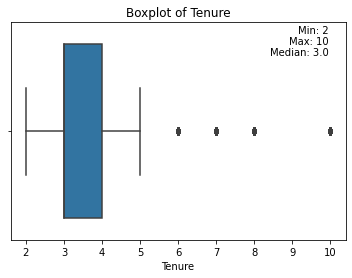

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df2, x='tenure')

# Add labels and title
plt.xlabel('Tenure')
plt.title('Boxplot of Tenure')

# Add descriptive statistics in the upper right corner
plt.text(0.95, 0.95, f"Min: {df2['tenure'].min()}", transform=plt.gca().transAxes, horizontalalignment='right')
plt.text(0.95, 0.9, f"Max: {df2['tenure'].max()}", transform=plt.gca().transAxes, horizontalalignment='right')
plt.text(0.95, 0.85, f"Median: {df2['tenure'].median()}", transform=plt.gca().transAxes, horizontalalignment='right')

# Display the plot
plt.show()


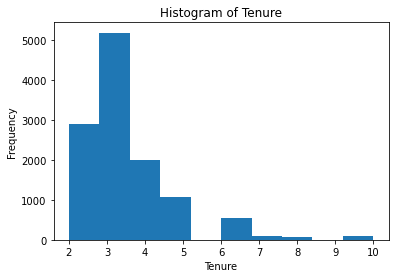

In [14]:
# Plot the bar graph
plt.hist(df2['tenure'])

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')

# Display the plot
plt.show()

In [15]:
## Determine the number of rows containing outliers
# Calculate the IQR for each column
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

# Determine the outliers using the IQR method
num_outliers = ((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1).sum()

# Optionally, use more lenient thresholds to identify only the more extreme values
#num_outliers = ((df2 < (Q1 - 10000 * IQR)) | (df2 > (Q3 + 10000 * IQR))).any(axis=1).sum()

# Print the number of rows containing outliers
print("Number of rows containing outliers (All Data): ", num_outliers)

## Calculate the IQR for the 'tenure' column
Q1t = df2['tenure'].quantile(0.25)
Q3t = df2['tenure'].quantile(0.75)
IQRt = Q3t - Q1t

# Determine the outliers using the IQR method
num_outliers_t = ((df2['tenure'] < (Q1t - 1.5 * IQRt)) | (df2['tenure'] > (Q3t + 3 * IQRt))).sum()

# Print the number of rows containing outliers
print("Number of rows containing outliers (tenure column only): ", num_outliers_t)

Number of rows containing outliers (All Data):  9342
Number of rows containing outliers (tenure column only):  188


In [16]:
# Percent of outliers in the data
cleaned_records = df2.shape[0]
print('Number of cleaned de-duplicated rows: ' + str(cleaned_records))
outlier_proportion = (num_outliers/cleaned_records)
outlier_percent = outlier_proportion*100
print('Percent of cleaned data that are outliers: {:.2f}%'.format(outlier_percent))

# Percent of outliers in the 'tenure' column
cleaned_records_t = len(df2['tenure'])
outlier_proportion_t = (num_outliers_t/cleaned_records_t)
outlier_percent_t = outlier_proportion_t*100
print('Percent of tenure data that are outliers: {:.2f}%'.format(outlier_percent_t))


Number of cleaned de-duplicated rows: 11991
Percent of cleaned data that are outliers: 77.91%
Percent of tenure data that are outliers: 1.57%


In [17]:
# There are very few outliers in the tenure dataframe column, but when the entire dataset is examined for outliers the 
# number of outliers appears to be most of the data set

# Note: Given that the percentage of data that are considered outliers is so high (77.91%) in all the data, it may be 
#prudent to perform more targeted analyses, and it may be useful to normalize the data. While using only outlier-free data to create a model will result in a lower 
# variance, it could greatly increase bias and decrease the accuracy of subsequent predictions. 

# Anomolous values for numerically encoded categorical variables are detected but class balances, determined using
# the value_counts() function, do not suggest that such anomalies exist within the categorical variables. Finally, the 
# large percentage of outliers provides guidance to implement models that are resistant to the effects of outliers (such as 
# robust regression, decision tree classifiers, and random forests). While multiple logistic regression models are more 
# resistant to the effects of outliers than linear regression models, they can still affect model coefficients and fitting.
# So, using a random forest model on all data is a good initial approach, with multiple logistic regression being a good
# choice for data that has had the outliers removed or replaced.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
#Show total number of records in the cleaned dataset, including outliers
shape = df2.shape[0]
print('Total number of clean records: {}'.format(shape))

# Get numbers of people who left vs. stayed
left = df2[df2['left'] == 1]
num_left = left['left'].sum()
num_stayed = cleaned_records - num_left
print('Number of employees that left: {}'.format(num_left))
print('Number of employees that stayed: {}'.format(num_stayed))

# Get percentages of people who left vs. stayed
percent_left = (num_left/cleaned_records) * 100
percent_stayed = (num_stayed/cleaned_records) * 100
print('Percent of employees that left: {:.2f}%'.format(percent_left))
print('Percent of employees that stayed: {:.2f}%'.format(percent_stayed))

Total number of clean records: 11991
Number of employees that left: 1991
Number of employees that stayed: 10000
Percent of employees that left: 16.60%
Percent of employees that stayed: 83.40%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

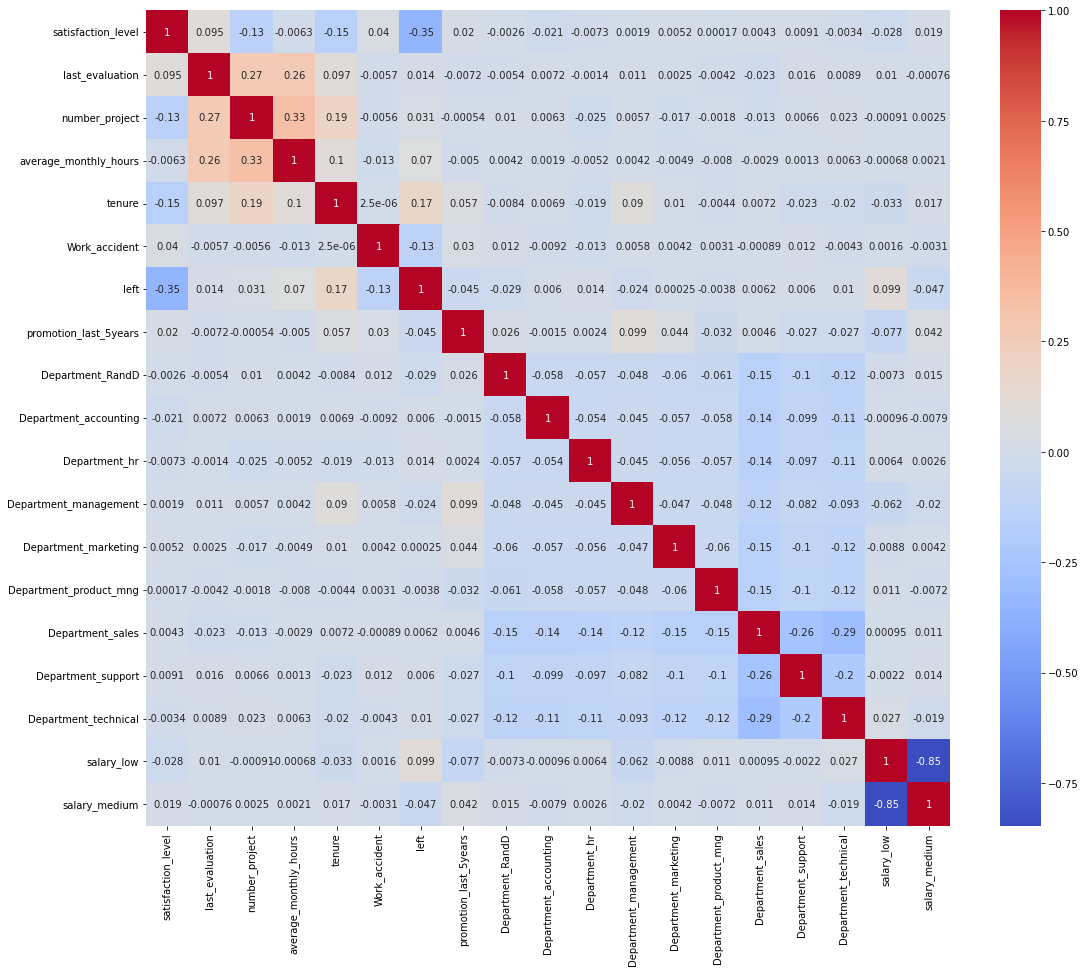

In [19]:
# The company is most interested in what factors might predict whether an employee will leave the company. Rather than 
# making assumptions about the data, I can tune a random forest and use the resulting model to illustrate feature 
# importance. Then, I can use the top features to create a multiple logistic regression model(binary classifier) with 
# reduced dimensionality.

# Create a plot as needed
correlation_matrix = df2.corr()

# Set up the figure with a larger size
plt.figure(figsize=(18, 15))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


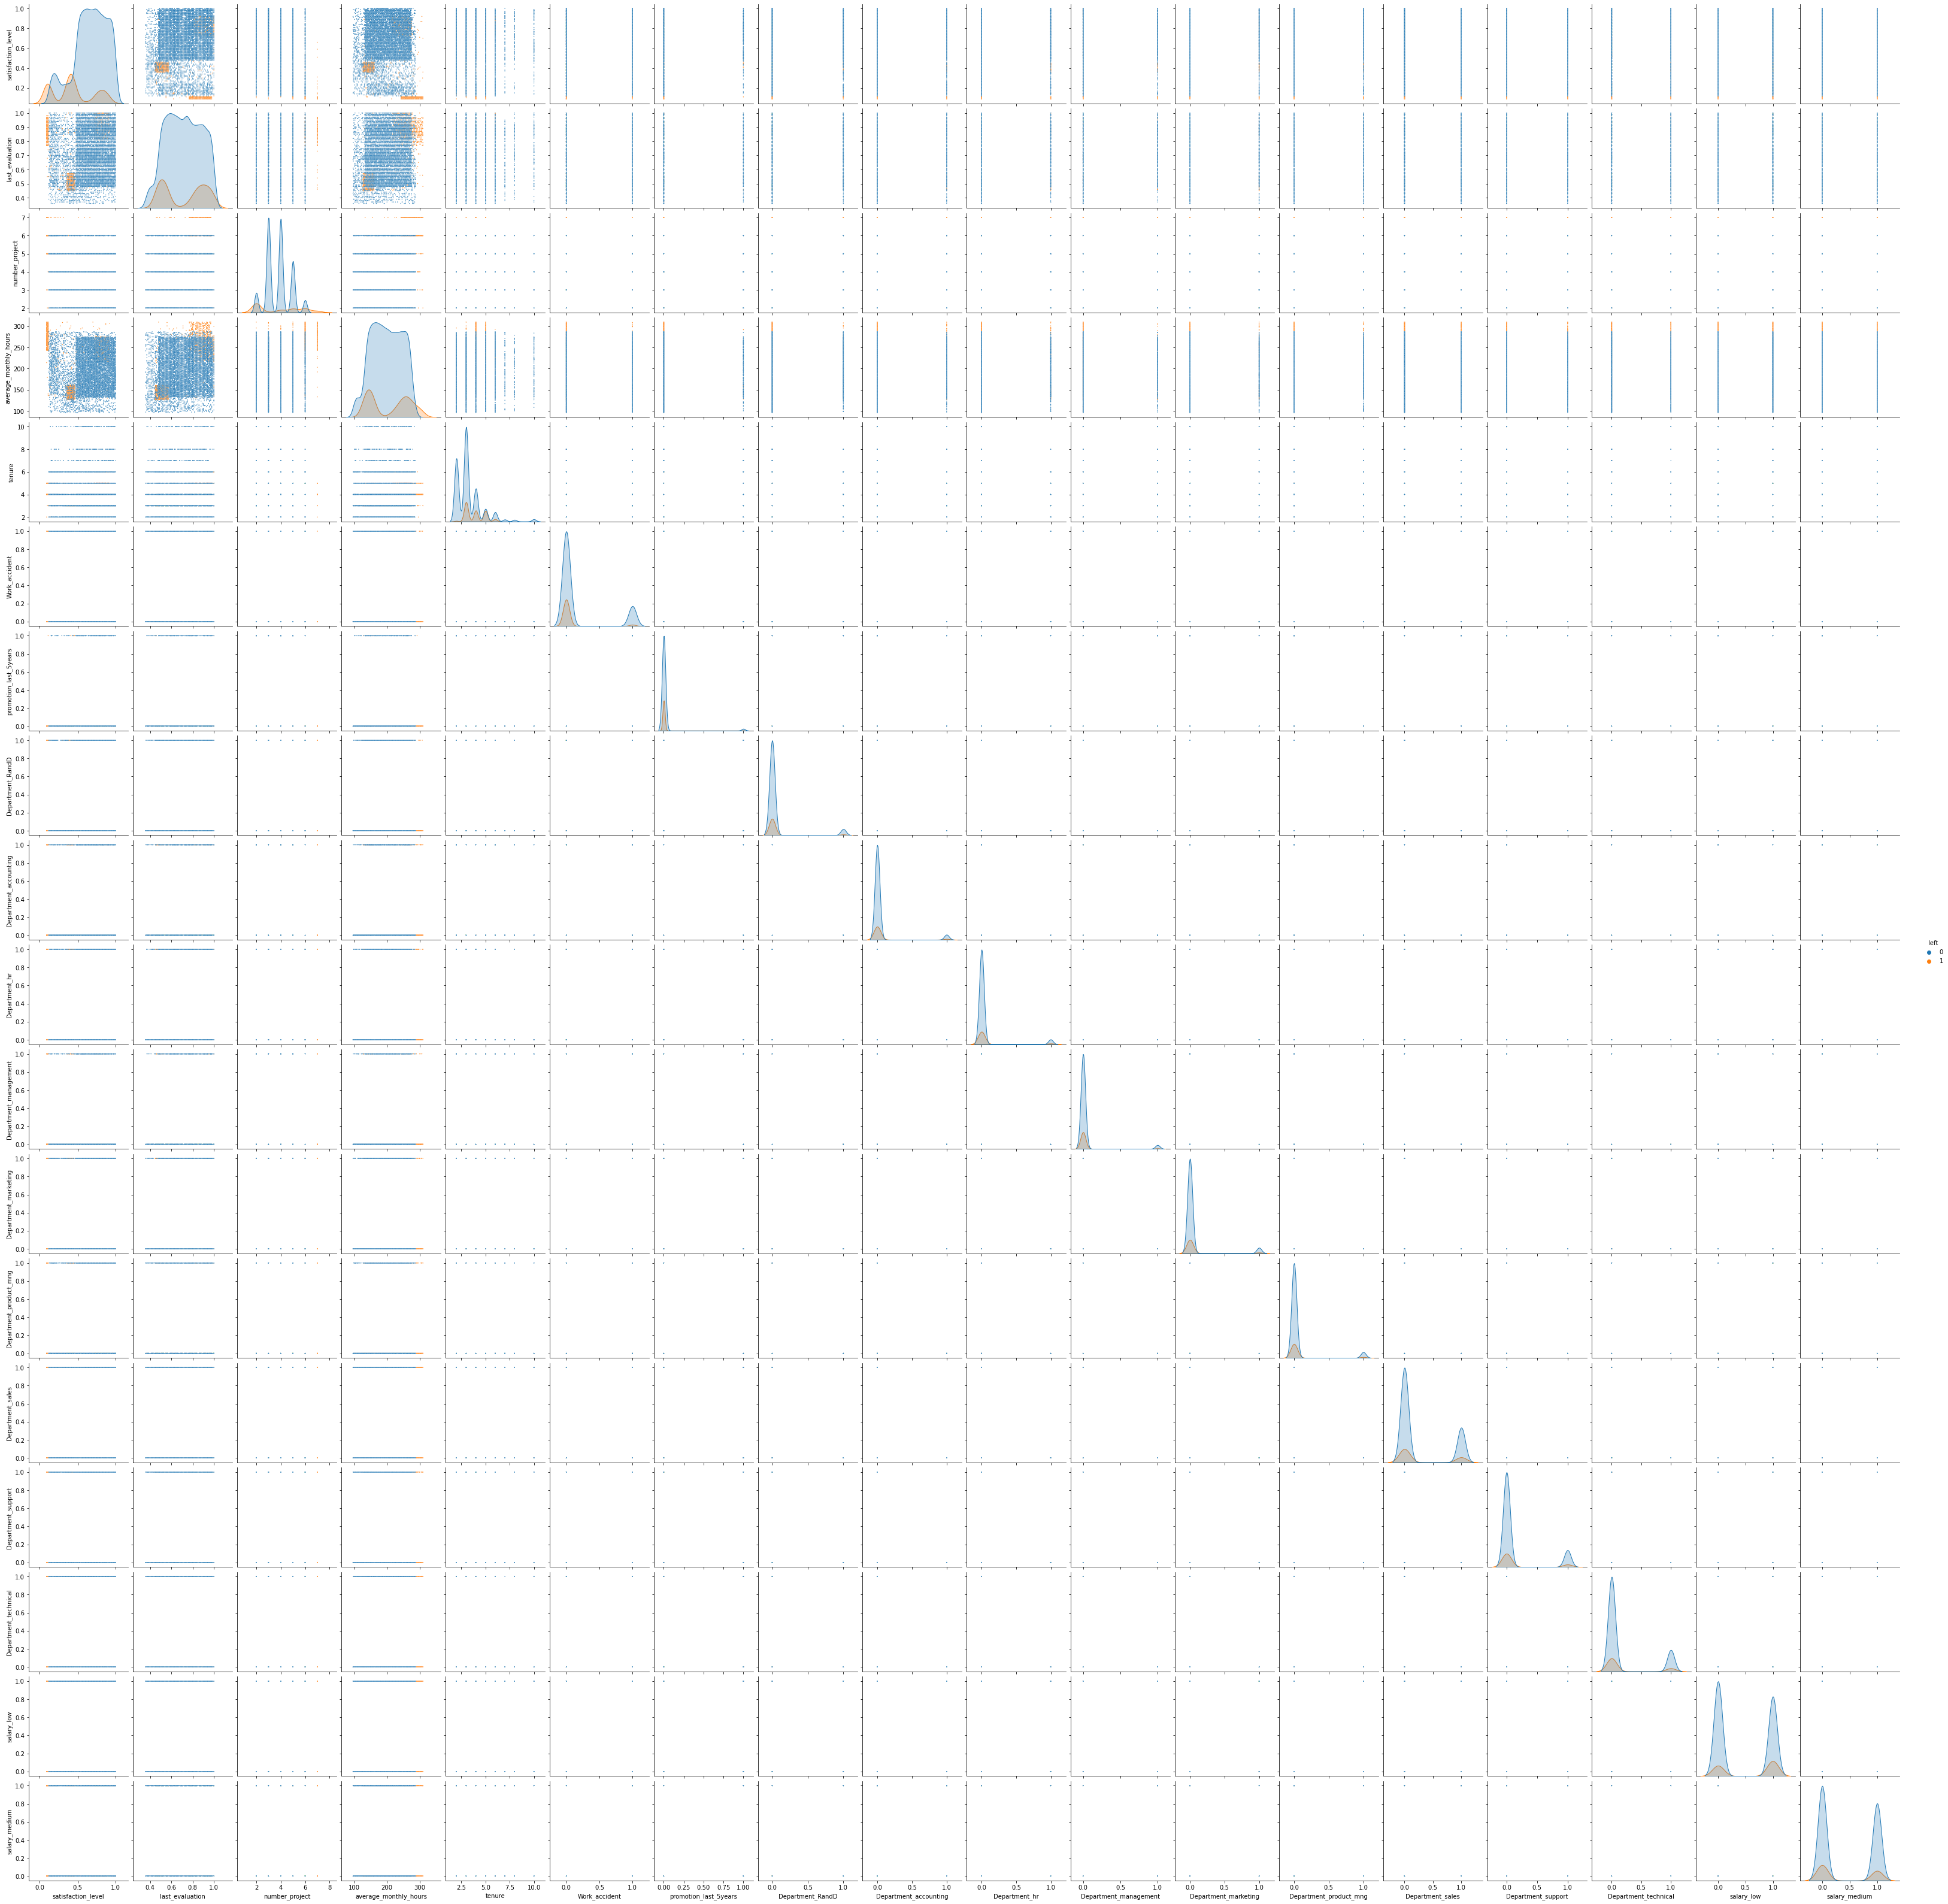

In [20]:
# create a pairplot for the data (orange data points represent employees that left)
marker_size = 2
sns.pairplot(df2, markers = 'o', plot_kws={'s': marker_size}, hue='left')
plt.show()

In [21]:
# Note: The pairplot shows that most of the variables are discrete (not continuous). This could pose a problem for some 
# kinds of analysis. There is a possiblility that some of the data should be normalized. 
# It could be instrumental to divide avg_monthly_hours, last_evaluation, and satisfaction_level each into multiple 
# categories in order to see whether any of them show a notable correlation to emplyees exodus (otherwise there does not 
# appear to be any strong correlations). 
# Another method that could be useful is to use a clustering algorithm to replace these 'uncorrelated' variables with more
# relevant data subsets. It is also useful to compare the average satisfaction, performance review score, and average 
# monthly hours for employees that left vs employees that stayed. The distribution of these variables can help to 
# determine probabilities associated with different thresholds.

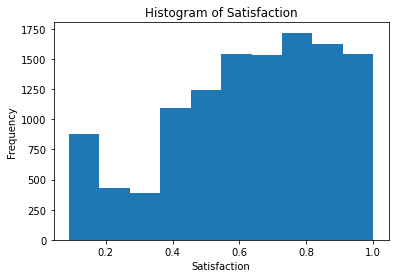

In [22]:
# Create a plot as needed
# Plot the histogram for satisfaction score
plt.hist(df2['satisfaction_level'])

# Add labels and title
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram of Satisfaction')

# Display the plot
plt.show()


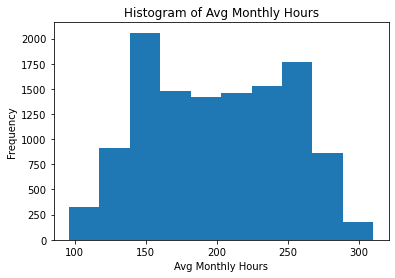

In [23]:
# Plot histogam of average_monthly_hours
plt.hist(df2['average_monthly_hours'])

# Add labels and title
plt.xlabel('Avg Monthly Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Monthly Hours')

# Display the plot
plt.show()


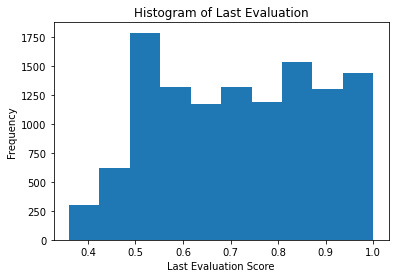

In [24]:
# Plot histogam of last_evaluation data
plt.hist(df2['last_evaluation'])

# Add labels and title
plt.xlabel('Last Evaluation Score')
plt.ylabel('Frequency')
plt.title('Histogram of Last Evaluation')

# Display the plot
plt.show()


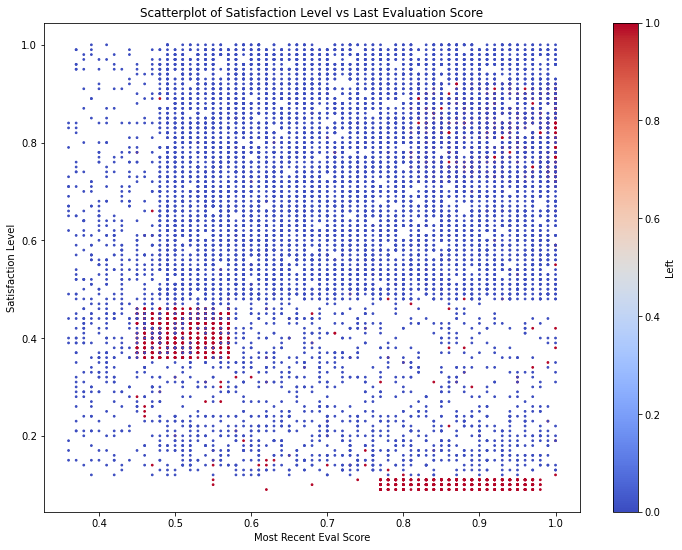

In [25]:
# Create a plot as needed
# Plot the scatter plot
plt.scatter(y = df2['satisfaction_level'], x = df2['last_evaluation'], c=df2['left'], s=3, cmap='coolwarm')

# Get the current figure
fig = plt.gcf()

# Set the figure size 
fig.set_size_inches(12, 9) 

# Add labels and title
plt.xlabel('Most Recent Eval Score')
plt.ylabel('Satisfaction Level')
plt.title('Scatterplot of Satisfaction Level vs Last Evaluation Score')

# Add colorbar
plt.colorbar(label='Left')

# Display the plot
plt.show()


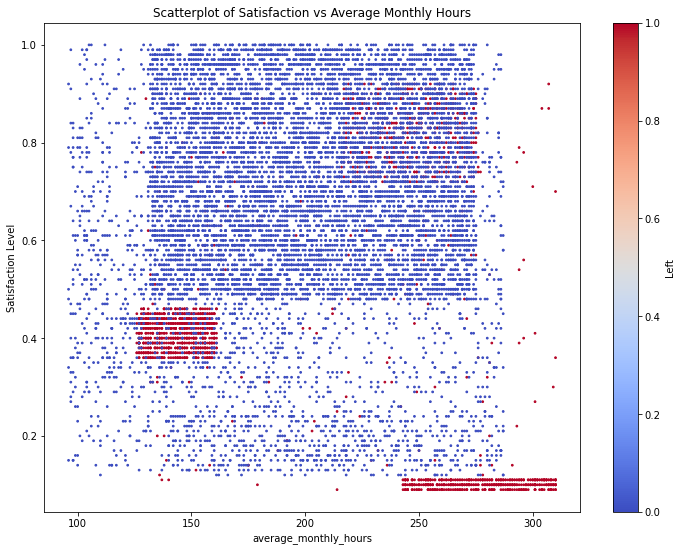

In [26]:
# Create a plot as needed
# Plot the scatter plot
plt.scatter(y = df2['satisfaction_level'], x = df2['average_monthly_hours'], c=df2['left'], s=3, cmap="coolwarm")

# Get the current figure
fig = plt.gcf()

# Set the figure size
fig.set_size_inches(12, 9)  

# Add labels and title
plt.xlabel('average_monthly_hours')
plt.ylabel('Satisfaction Level')
plt.title('Scatterplot of Satisfaction vs Average Monthly Hours')

# Add colorbar
plt.colorbar(label='Left')

# Display the plot
plt.show()


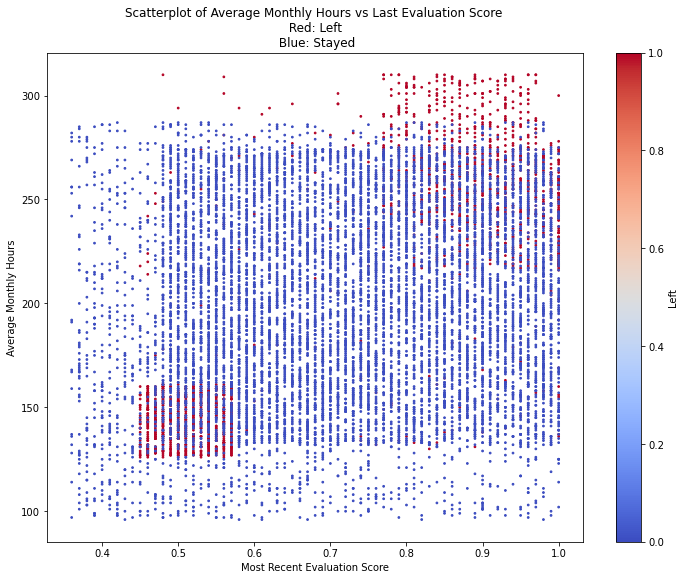

In [27]:
# In the scatterplot below, data points are colored yellow when an employee has left, and purple when the employee did not
# leave. Data for employees that stayed are assigned a purple color. 
# Plot the scatter plot
plt.scatter(y = df2['average_monthly_hours'], x = df2['last_evaluation'], c=df2['left'], s=3, cmap="coolwarm")

# Get the current figure
fig = plt.gcf()

# Set the figure size
fig.set_size_inches(12, 9)  

# Add labels and title
plt.xlabel('Most Recent Evaluation Score')
plt.ylabel('Average Monthly Hours')
plt.title('Scatterplot of Average Monthly Hours vs Last Evaluation Score \n Red: Left \n Blue: Stayed')

# Add colorbar
plt.colorbar(label='Left')

# Display the plot
plt.show()

In [28]:
# These plots appear to show correlation between some of the variables, meaning that models which assume
# independence between variables may not be good choices.  

### Insights

These plots appear to show correlation between some of the variables, meaning that models which require 
independence between variables may not be good choices. It may also be possible to create new variables from the available data, which can be useful for further analysis.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Initially, I will be using an XGBoost model to determinine the most relevant data variables. As I follow-up, I plan to use this information to construct a multiple logistic regression model with reduced dimensionality.

### Identify the types of models most appropriate for this task.

Because of the presence of a large number of outliers, models such as robust logistic regression, decision trees, and decision tree ensembles are appropriate.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [29]:
y = df2['left']

# Define the X (predictor) variables.
X = df2.copy()
X = X.drop(['left'], axis = 1)

# Perform the split operation on your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Define parameters for tuning as `cv_params`.
cv_params = {'max_depth': [10],
              'min_child_weight': [0.75, 0.8, 0.85],
              'learning_rate': [0.375, 0.4, 4.225],
              'n_estimators': [10],
              'subsample': [1, 2 ,10],
              'colsample_bytree': [0.6, 0.65, 0.75]
              }

# Define your criteria as `scoring`.
scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'f1', n_jobs = -1, verbose=True)

In [30]:
%%time
# fit the GridSearch model to training data
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    5.7s


CPU times: user 729 ms, sys: 100 ms, total: 829 ms
Wall time: 10.3 s


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   10.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.65, 0.75],
                         'learning_rate': [0.375,

In [31]:
best = xgb_cv.best_params_
print(best)

{'colsample_bytree': 0.65, 'learning_rate': 0.375, 'max_depth': 10, 'min_child_weight': 0.85, 'n_estimators': 10, 'subsample': 1}


In [32]:
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

In [33]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred = xgb_cv.predict(X_test)

In [34]:
# 1. Print your accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9866577718478986
precision score: 0.9821428571428571
recall score: 0.9322033898305084
f1 score: 0.9565217391304348


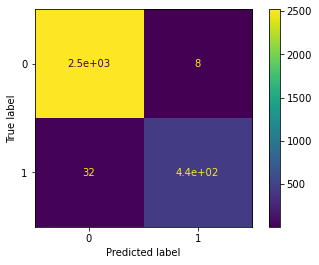

In [35]:
# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.
disp.plot()

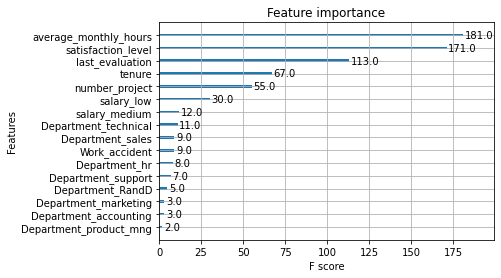

In [36]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_)

In [37]:
df_subset = df2.astype({"average_monthly_hours": float, "satisfaction_level": float, "last_evaluation": float,"tenure": float, "number_project": float, "salary_low": float, "Department_technical": float, "Department_sales": float, "Work_accident": float})

In [38]:
# Now that we can see an estimate of relative feature improtance, the most important features will be used in a multiple logistic regression model

# Make a copy of the dataframe used in the XGBoost model
df3 = df_subset.copy()
# Define the OLS formula.
# Create training data sets and holdout (testing) data sets
data_X = df3[['average_monthly_hours', 'satisfaction_level', 'last_evaluation','tenure', 'number_project', 'salary_low', 'Department_technical', 'Department_sales', 'Work_accident']]
data_y = df3['left']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.3, random_state = 42)

In [47]:
data_X = sm.add_constant(data_X)  # Add a constant term to the predictor variables
model = sm.OLS(data_y, data_X).fit()  # Fit the multiple linear regression model

print(model.summary())  # Print the summary of the regression model

# Step 3: Predict the Test Results
predicted_values = model.predict(data_X)

# Step 4: Evaluate the Model
from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared:", r2)  # Evaluate the accuracy of the model


                            OLS Regression Results                            
Dep. Variable:                   left   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     265.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:29:47   Log-Likelihood:                -4069.1
No. Observations:               11991   AIC:                             8158.
Df Residuals:                   11981   BIC:                             8232.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

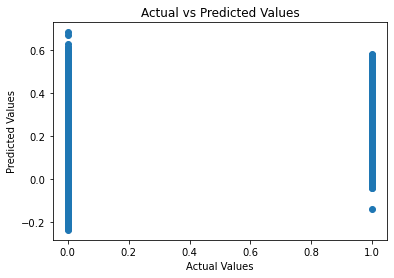

In [48]:
# Scatter plot between actual values and predicted values
plt.scatter(y, predicted_values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [41]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-1.85038677  1.36700168 -2.06549308 ... -0.47649426  1.64633935
  -0.42283819]
 [-0.26890904 -1.81427262  1.68211971 ... -0.47649426 -0.60740819
   2.36497087]
 [-1.09045591 -0.7400761  -0.87577474 ... -0.47649426 -0.60740819
  -0.42283819]
 ...
 [-0.2278317   0.87121867 -1.11371841 ...  2.09866115 -0.60740819
  -0.42283819]
 [-1.1726106  -0.8227066  -1.41114799 ... -0.47649426  1.64633935
  -0.42283819]
 [-1.09045591 -0.69876085 -1.82754941 ... -0.47649426  1.64633935
  -0.42283819]]


In [42]:
# label encode the target data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [43]:
lr = LogisticRegression()
clf = lr.fit(X_train_scaled,y_train_encoded)

In [44]:
# Print the coefficient
clf.coef_

array([[ 0.19403625, -0.95033477,  0.12954955,  0.36986705, -0.31353933,
         0.30776406,  0.02923736,  0.03679045, -0.47116719]])

In [45]:
# Print the intercept
clf.intercept_

array([-2.05274126])

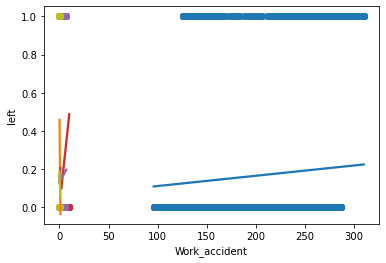

In [50]:
# Regression plot for individual predictor variables
sns.regplot(x="average_monthly_hours", y="left", data=df_subset, ci=None)
sns.regplot(x="satisfaction_level", y="left", data=df_subset, ci=None)
sns.regplot(x="last_evaluation", y="left", data=df_subset, ci=None)
sns.regplot(x="tenure", y="left", data=df_subset, ci=None)
sns.regplot(x="number_project", y="left", data=df_subset, ci=None)
sns.regplot(x="salary_low", y="left", data=df_subset, ci=None)
sns.regplot(x="Department_technical", y="left", data=df_subset, ci=None)
sns.regplot(x="Department_sales", y="left", data=df_subset, ci=None)
sns.regplot(x="Work_accident", y="left", data=df_subset, ci=None)

In [ ]:
# Plot the logistic regression and its confidence band (may require editing)
#sns.regplot(x=data_X, y=data_y, data=df_subset, logistic=True, ci=None)
#sns.lmplot(x="satisfaction_level", y="left", data=df_subset, logistic=True, ci=None, col="variable_name")

In [51]:
# Save predictions
y_pred = clf.predict(X_test)

In [59]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [60]:
# Print out evaluation metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.167593
Precision: 0.167593
Recall: 1.000000
F1 Score: 0.287075


In [61]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [62]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

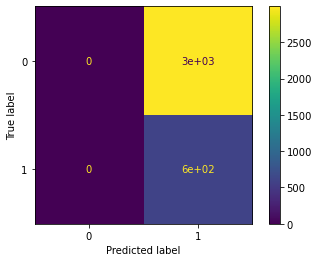

In [63]:
# Display the confusion matrix
disp.plot()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



As this was an optional assignment I will continue the analysis from different approaches in future iterations

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

As this was an optional assignment I will continue the analysis from different approaches in future iterations

### Conclusion, Recommendations, Next Steps

As this was an optional assignment I will continue the analysis from different approaches in future iterations. Conclusions,recommendations, and next steps will not be complete until further modeling is performed.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.